# Desicion surface based on MLP


# Importing required libraries


In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout

In [99]:
data=pd.read_csv(r"C:\Users\DELL\Desktop\downloads\4.linearsep.csv",header=None)

In [100]:
data[2].value_counts()

1.0    50
0.0    50
Name: 2, dtype: int64

In [101]:
data

,0,1,2
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0
...,...,...,...
95,2.632382,1.271305,0.0
96,-0.040256,1.782708,1.0
97,-0.787453,1.400357,1.0
98,2.702441,1.587444,0.0


This dataset consists of 100 datapoints with three feature variables.


# Splitting of dataset

In [102]:
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.1)

In [103]:
scaler = StandardScaler()


In [104]:
scalard=scaler.fit_transform(x_train)

# Scatterplot of original dataset

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

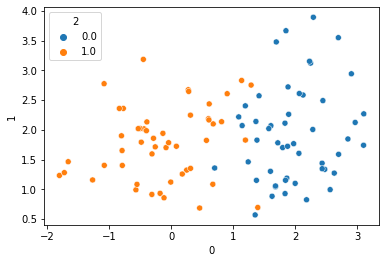

In [105]:
sns.scatterplot(data[0],data[1],hue=data[2])

# Creating hidden layers 

In [106]:
model = Sequential()
model.add(Dense(7,activation='relu',input_dim=2,kernel_initializer="he_uniform"))
model.add(Dense(4,activation='tanh',kernel_initializer="glorot_uniform"))
model.add(Dense(1,activation='sigmoid'))

Here I created four dense layers that is nothing but fully connected layers .

first_layer ---activation function used is relu which works best with the combination of he_normal/uniform kernel_initializer

second_layer---activation function used is tanh which works best with the combination of glorot_normal/uniform kernel_initializer


the final layer should be sigmoid activation function as it is dealing with binary classification only one output is required

In [107]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 7)                 21        
                                                                 
 dense_25 (Dense)            (None, 4)                 32        
                                                                 
 dense_26 (Dense)            (None, 1)                 5         
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


# Compiling 

In [108]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

compiling we get to know the loss fuction and optimal weight by optimizer accuracy by metrics

optimizer which is widely used is "adam" 

as it is two class classification we use binary_crossentropy as loss function 

# Training

In [109]:
save=model.fit(x_train,y_train,batch_size=10,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
8/8 [==============================] - 2s 59ms/step - loss: 0.5114 - accuracy: 0.9306 - val_loss: 0.4820 - val_accuracy: 0.8889
Epoch 2/20
8/8 [==============================] - 0s 12ms/step - loss: 0.4929 - accuracy: 0.9306 - val_loss: 0.4659 - val_accuracy: 0.9444
Epoch 3/20
8/8 [==============================] - 0s 12ms/step - loss: 0.4764 - accuracy: 0.9306 - val_loss: 0.4506 - val_accuracy: 0.9444
Epoch 4/20
8/8 [==============================] - 0s 11ms/step - loss: 0.4604 - accuracy: 0.9306 - val_loss: 0.4348 - val_accuracy: 0.9444
Epoch 5/20
8/8 [==============================] - 0s 11ms/step - loss: 0.4455 - accuracy: 0.9306 - val_loss: 0.4206 - val_accuracy: 0.9444
Epoch 6/20
8/8 [==============================] - 0s 11ms/step - loss: 0.4307 - accuracy: 0.9306 - val_loss: 0.4070 - val_accuracy: 0.9444
Epoch 7/20
8/8 [==============================] - 0s 11ms/step - loss: 0.4180 - accuracy: 0.9306 - val_loss: 0.3966 - val_accuracy: 0.9444
Epoch 8/20
8/8 [===========

for training we use training set

when we give batchsize internally is is using mini_batch SGD 

epochs used are 20 , it gives loss function for every epoch 

1 epoch is equal to all the datapoints once finish iteration 

here total 100 datapoints batch_size is 10 that means 10 batchs , that is if 10 batche sfinish their iteration once 

it is 1 epoch and 1 loss function

In [110]:
tl1=save.history["loss"]
cvl1=save.history["val_loss"]

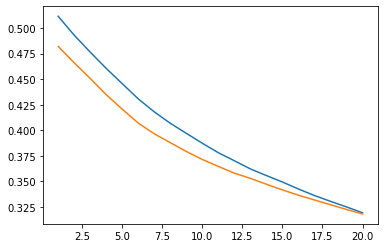

In [111]:
plt.plot(range(1,21),tl1,label="training_loss")
plt.plot(range(1,21),cvl1,label="crossval_loss")

this is plot for training_loss and crossval_loss , there is a little   overfitting issue with this dataset

In [112]:
pred=model.predict(x_train)

3/3 [==============================] - 0s 11ms/step


for predicting the model accuracy we pass x_train set and predict the model

In [113]:
predi1=np.where(pred>0.5,1,0).flatten()

as the class label here are 1 and 0,using numpy.where function we label the predicted values and flatten them to an array

and find the accuracy score

In [114]:
accuracy_score(y_train,predi1)

0.9444444444444444

# Decision surface 

In [115]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 10s 3ms/step


<AxesSubplot:>

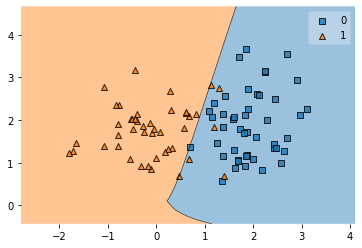

In [116]:
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)